# script 1: Collect Samples
This tool converts a folder of samples to a big rectangular matrix with one mono sample per row.

Samples should be placed in `data/mydataset/samples/`. They could be `.mp3`, `.wav`, or anything else that ffmpeg can work with. They may be all in one folder, or in nested sub-folders.

Change the path below to point to the root directory, e.g., `data/mydataset/`.

The samplerate `sr` is not necessarily the native samplerate of the samples, it's the samplerate you want to load them at.

The output of this notebook is:
* `data/mydataset/durations.txt`
* `data/mydataset/filenames.txt`
* `data/mydataset/samples.npy`

In [26]:
main_root = '/Users/skabbit/Projects/chosician/'
data_root = main_root + "data_sets/short stones/"
sr = 44100
max_length = sr*4 # ignore samples longer than 4 seconds
seg_time = 250 # ms (default was 250)
fixed_length = sr * seg_time / 1000
# fixed_length = sr/4 # trim all samples to 250 milliseconds

limit = 255 # set this to 100 to only load the first 100 samples

In [27]:
import numpy as np
from os.path import join
from utils import *
from multiprocessing import Pool

In [28]:
files = list(list_all_files(join(data_root), ['.wav']))[:limit]
len(files)

255

In [29]:
import os
def load_sample(fn, sr=None,
                max_length=None, fixed_length=None, normalize=True):
    if fn == '': # ignore empty filenames
        return None
    if not os.path.exists(fn):
        print('no file' + fn)
        return None
    audio, _ = ffmpeg_load_audio(fn, sr, mono=True)
    duration = len(audio)

    if duration == 0: # ignore zero-length samples
        return None
    if max_length and duration >= max_length: # ignore long samples
        return None 
    if fixed_length:
        audio.resize(fixed_length)
    max_val = np.abs(audio).max()
    if max_val == 0: # ignore completely silent sounds
        return None
    if normalize:
        audio /= max_val
    return (fn, audio, duration)

In [30]:
results = []
for fn in files:
    results.append(load_sample(fn, sr=sr, max_length=max_length, fixed_length=fixed_length))

# def job(fn):
#     print(fn)
#     return load_sample(fn, sr=sr,
#                        max_length=max_length, fixed_length=fixed_length)

# pool = Pool()
# results = pool.map(job, files[:limit])
# print('Processed', len(results), 'samples')

/Users/skabbit/Projects/chosician/data_sets/short stones/stones 1 short_0056.509229.wav
ffmpeg -i /Users/skabbit/Projects/chosician/data_sets/short stones/stones 1 short_0056.509229.wav -f s16le -acodec pcm_s16le -ar 44100 -ac 1 -
/Users/skabbit/Projects/chosician/data_sets/short stones/stones 1 short_0040.697392.wav
ffmpeg -i /Users/skabbit/Projects/chosician/data_sets/short stones/stones 1 short_0040.697392.wav -f s16le -acodec pcm_s16le -ar 44100 -ac 1 -
/Users/skabbit/Projects/chosician/data_sets/short stones/stones 1 short_0096.691179.wav
ffmpeg -i /Users/skabbit/Projects/chosician/data_sets/short stones/stones 1 short_0096.691179.wav -f s16le -acodec pcm_s16le -ar 44100 -ac 1 -
/Users/skabbit/Projects/chosician/data_sets/short stones/stones 1 short_0057.996259.wav
ffmpeg -i /Users/skabbit/Projects/chosician/data_sets/short stones/stones 1 short_0057.996259.wav -f s16le -acodec pcm_s16le -ar 44100 -ac 1 -
/Users/skabbit/Projects/chosician/data_sets/short stones/stones 1 short_0007

/Users/skabbit/Projects/chosician/data_sets/short stones/stones 1 short_0056.862766.wav
ffmpeg -i /Users/skabbit/Projects/chosician/data_sets/short stones/stones 1 short_0056.862766.wav -f s16le -acodec pcm_s16le -ar 44100 -ac 1 -
/Users/skabbit/Projects/chosician/data_sets/short stones/stones 1 short_0132.829569.wav
ffmpeg -i /Users/skabbit/Projects/chosician/data_sets/short stones/stones 1 short_0132.829569.wav -f s16le -acodec pcm_s16le -ar 44100 -ac 1 -
/Users/skabbit/Projects/chosician/data_sets/short stones/stones 1 short_0107.954331.wav
ffmpeg -i /Users/skabbit/Projects/chosician/data_sets/short stones/stones 1 short_0107.954331.wav -f s16le -acodec pcm_s16le -ar 44100 -ac 1 -
/Users/skabbit/Projects/chosician/data_sets/short stones/stones 1 short_0071.435193.wav
ffmpeg -i /Users/skabbit/Projects/chosician/data_sets/short stones/stones 1 short_0071.435193.wav -f s16le -acodec pcm_s16le -ar 44100 -ac 1 -
/Users/skabbit/Projects/chosician/data_sets/short stones/stones 1 short_0005

/Users/skabbit/Projects/chosician/data_sets/short stones/stones 1 short_0021.357007.wav
ffmpeg -i /Users/skabbit/Projects/chosician/data_sets/short stones/stones 1 short_0021.357007.wav -f s16le -acodec pcm_s16le -ar 44100 -ac 1 -
/Users/skabbit/Projects/chosician/data_sets/short stones/stones 1 short_0034.478571.wav
ffmpeg -i /Users/skabbit/Projects/chosician/data_sets/short stones/stones 1 short_0034.478571.wav -f s16le -acodec pcm_s16le -ar 44100 -ac 1 -
/Users/skabbit/Projects/chosician/data_sets/short stones/stones 1 short_0075.953583.wav
ffmpeg -i /Users/skabbit/Projects/chosician/data_sets/short stones/stones 1 short_0075.953583.wav -f s16le -acodec pcm_s16le -ar 44100 -ac 1 -
/Users/skabbit/Projects/chosician/data_sets/short stones/stones 1 short_0069.520091.wav
ffmpeg -i /Users/skabbit/Projects/chosician/data_sets/short stones/stones 1 short_0069.520091.wav -f s16le -acodec pcm_s16le -ar 44100 -ac 1 -
/Users/skabbit/Projects/chosician/data_sets/short stones/stones 1 short_0118

/Users/skabbit/Projects/chosician/data_sets/short stones/stones 1 short_0111.751587.wav
ffmpeg -i /Users/skabbit/Projects/chosician/data_sets/short stones/stones 1 short_0111.751587.wav -f s16le -acodec pcm_s16le -ar 44100 -ac 1 -
/Users/skabbit/Projects/chosician/data_sets/short stones/stones 1 short_0058.304762.wav
ffmpeg -i /Users/skabbit/Projects/chosician/data_sets/short stones/stones 1 short_0058.304762.wav -f s16le -acodec pcm_s16le -ar 44100 -ac 1 -
/Users/skabbit/Projects/chosician/data_sets/short stones/stones 1 short_0094.169365.wav
ffmpeg -i /Users/skabbit/Projects/chosician/data_sets/short stones/stones 1 short_0094.169365.wav -f s16le -acodec pcm_s16le -ar 44100 -ac 1 -
/Users/skabbit/Projects/chosician/data_sets/short stones/stones 1 short_0017.934535.wav
ffmpeg -i /Users/skabbit/Projects/chosician/data_sets/short stones/stones 1 short_0017.934535.wav -f s16le -acodec pcm_s16le -ar 44100 -ac 1 -
/Users/skabbit/Projects/chosician/data_sets/short stones/stones 1 short_0079

/Users/skabbit/Projects/chosician/data_sets/short stones/stones 1 short_0084.613946.wav
ffmpeg -i /Users/skabbit/Projects/chosician/data_sets/short stones/stones 1 short_0084.613946.wav -f s16le -acodec pcm_s16le -ar 44100 -ac 1 -
/Users/skabbit/Projects/chosician/data_sets/short stones/stones 1 short_0015.849637.wav
ffmpeg -i /Users/skabbit/Projects/chosician/data_sets/short stones/stones 1 short_0015.849637.wav -f s16le -acodec pcm_s16le -ar 44100 -ac 1 -
/Users/skabbit/Projects/chosician/data_sets/short stones/stones 1 short_0066.167188.wav
ffmpeg -i /Users/skabbit/Projects/chosician/data_sets/short stones/stones 1 short_0066.167188.wav -f s16le -acodec pcm_s16le -ar 44100 -ac 1 -
/Users/skabbit/Projects/chosician/data_sets/short stones/stones 1 short_0061.061950.wav
ffmpeg -i /Users/skabbit/Projects/chosician/data_sets/short stones/stones 1 short_0061.061950.wav -f s16le -acodec pcm_s16le -ar 44100 -ac 1 -
/Users/skabbit/Projects/chosician/data_sets/short stones/stones 1 short_0046

/Users/skabbit/Projects/chosician/data_sets/short stones/stones 1 short_0083.081610.wav
ffmpeg -i /Users/skabbit/Projects/chosician/data_sets/short stones/stones 1 short_0083.081610.wav -f s16le -acodec pcm_s16le -ar 44100 -ac 1 -
/Users/skabbit/Projects/chosician/data_sets/short stones/stones 1 short_0139.001383.wav
ffmpeg -i /Users/skabbit/Projects/chosician/data_sets/short stones/stones 1 short_0139.001383.wav -f s16le -acodec pcm_s16le -ar 44100 -ac 1 -
/Users/skabbit/Projects/chosician/data_sets/short stones/stones 1 short_0117.166122.wav
ffmpeg -i /Users/skabbit/Projects/chosician/data_sets/short stones/stones 1 short_0117.166122.wav -f s16le -acodec pcm_s16le -ar 44100 -ac 1 -
/Users/skabbit/Projects/chosician/data_sets/short stones/stones 1 short_0060.907279.wav
ffmpeg -i /Users/skabbit/Projects/chosician/data_sets/short stones/stones 1 short_0060.907279.wav -f s16le -acodec pcm_s16le -ar 44100 -ac 1 -
/Users/skabbit/Projects/chosician/data_sets/short stones/stones 1 short_0107

/Users/skabbit/Projects/chosician/data_sets/short stones/stones 1 short_0062.960295.wav
ffmpeg -i /Users/skabbit/Projects/chosician/data_sets/short stones/stones 1 short_0062.960295.wav -f s16le -acodec pcm_s16le -ar 44100 -ac 1 -
/Users/skabbit/Projects/chosician/data_sets/short stones/stones 1 short_0023.090680.wav
ffmpeg -i /Users/skabbit/Projects/chosician/data_sets/short stones/stones 1 short_0023.090680.wav -f s16le -acodec pcm_s16le -ar 44100 -ac 1 -
/Users/skabbit/Projects/chosician/data_sets/short stones/stones 1 short_0061.599274.wav
ffmpeg -i /Users/skabbit/Projects/chosician/data_sets/short stones/stones 1 short_0061.599274.wav -f s16le -acodec pcm_s16le -ar 44100 -ac 1 -
/Users/skabbit/Projects/chosician/data_sets/short stones/stones 1 short_0141.523447.wav
ffmpeg -i /Users/skabbit/Projects/chosician/data_sets/short stones/stones 1 short_0141.523447.wav -f s16le -acodec pcm_s16le -ar 44100 -ac 1 -
/Users/skabbit/Projects/chosician/data_sets/short stones/stones 1 short_0055

In [49]:
valid = filter(None, results)
filenames = [x[0] for x in valid]
samples = [x[1] for x in valid]
durations = [x[2] for x in valid]
samples = np.asarray(samples)
np.savetxt(join(data_root, 'filenames.txt'), map(lambda x: x.rsplit('/')[-1], filenames), fmt='%s')
np.savetxt(join(data_root, 'durations.txt'), durations, fmt='%i')
np.save(join(data_root, 'samples.npy'), samples)
print('Saved', len(valid), 'samples')

('Saved', 255, 'samples')


# script 2: Samples to Fingerprints
This notebook converts `samples.npy` to `fingerprints.npy`. After processing, check the max and mean images to make sure that you are not over- or under-cropping the data. Set `crop_rows` or `crop_cols` to `None` to see all the data.

In [32]:
n_fft = 1024
hop_length = n_fft/4
use_logamp = False # boost the brightness of quiet sounds
reduce_rows = 10 # how many frequency bands to average into one
reduce_cols = 1 # how many time steps to average into one
crop_rows = 32 # limit how many frequency bands to use
crop_cols = 32 # limit how many time steps to use
limit = None # set this to 100 to only process 100 samples

In [33]:
%matplotlib inline
from utils import *
from tqdm import *
from os.path import join
from matplotlib import pyplot as plt
from skimage.measure import block_reduce
from multiprocessing import Pool
import numpy as np
import librosa

In [34]:
# %time samples = np.load(join(data_root, 'samples.npy'))

In [35]:
window = np.hanning(n_fft)
def job(y):
    S = librosa.stft(y, n_fft=n_fft, hop_length=hop_length, window=window)
    amp = np.abs(S)
    if reduce_rows > 1 or reduce_cols > 1:
        amp = block_reduce(amp, (reduce_rows, reduce_cols), func=np.mean)
    if amp.shape[1] < crop_cols:
        amp = np.pad(amp, ((0, 0), (0, crop_cols-amp.shape[1])), 'constant')
    amp = amp[:crop_rows, :crop_cols]
    if use_logamp:
        amp = librosa.logamplitude(amp**2)
    amp -= amp.min()
    if amp.max() > 0:
        amp /= amp.max()
    amp = np.flipud(amp) # for visualization, put low frequencies on bottom
    return amp
pool = Pool()
fingerprints = pool.map(job, samples[:limit])
fingerprints = np.asarray(fingerprints).astype(np.float32)

In [36]:
np.save(join(data_root, 'fingerprints.npy'), fingerprints)

('data shape:', (255, 32, 32))
mean:


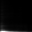

max:


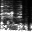

random selection:


StopIteration: 

In [40]:
print('data shape:', np.shape(fingerprints))

mean = np.mean(fingerprints, axis=0)
mean -= mean.min()
mean /= mean.max()

print('mean:')
show_array(255 * mean)
print('max:')
show_array(255 * np.max(fingerprints, axis=0))

print('random selection:')
indices = range(len(fingerprints))
np.random.shuffle(indices)
show_array(255 * make_mosaic(np.array(fingerprints)[indices], n=16))

# script 3: Fingerprints to t-SNE
This converts `fingerprints.npy` to `.tsv` formatted t-SNE embeddings and plots of those embeddings in the `tsne/` and `plot/` folders respectively. If you add multiple values to `perplexity` and `initial_dims` then all combinations will be computed (in parallel). Good perplexities are in the range 1-200 with the best range around 30-100. Good `initial_dims` are in the range 30 and higher, with the dimensionality of your input data being the highest possible value (e.g., a 32x32 fingerprint would have a highest possible `initial_dims` value of 32x32=1024).

Change the "mode" to try different t-SNE variations.
* "fingerprints" will only use `fingerprints.npy`
* "predicted_labels" will only use `predicted_labels.npy`
* "predicted_encoding" will only use `predicted_encoding.npy`
* "combined" will use all of the above data

In [38]:
initial_dims = [30]
perplexities = [30]
mode = 'fingerprints'
# mode = 'predicted_labels'
# mode = 'predicted_encoding'
# mode = 'combined'

In [41]:
%matplotlib inline
from matplotlib import pyplot as plt
from time import time
from utils import *
from os.path import join
from multiprocessing import Pool
import numpy as np
import itertools

In [42]:
def save_tsv(data, fn):
    np.savetxt(fn, data, fmt='%.5f', delimiter='\t')
def tsne(data, data_root, prefix, initial_dims=30, perplexity=30):
    mkdir_p(data_root + 'tsne')
    mkdir_p(data_root + 'plot')
    
    figsize = (16,16)
    pointsize = 2

    X_2d = list(bh_tsne(data, initial_dims=initial_dims, perplexity=perplexity, no_dims=2))
    X_2d = normalize(np.array(X_2d))
    save_tsv(X_2d, join(data_root, 'tsne/{}.{}.{}.2d.tsv'.format(prefix, initial_dims, perplexity)))
    
    plt.figure(figsize=figsize)
    plt.scatter(X_2d[:,0], X_2d[:,1], edgecolor='', s=pointsize)
    plt.tight_layout()
    plt.savefig(join(data_root, 'plot/{}.{}.{}.png'.format(prefix, initial_dims, perplexity)))
    plt.close()
    
    X_3d = list(bh_tsne(data, initial_dims=initial_dims, perplexity=perplexity, no_dims=3))
    X_3d = normalize(np.array(X_3d))
    save_tsv(X_3d, join(data_root, 'tsne/{}.{}.{}.3d.tsv'.format(prefix, initial_dims, perplexity)))
    
    plt.figure(figsize=figsize)
    plt.scatter(X_2d[:,0], X_2d[:,1], edgecolor='', s=pointsize, c=X_3d)
    plt.tight_layout()
    plt.savefig(join(data_root, 'plot/{}.{}.{}.png'.format(prefix, initial_dims, perplexity)))
    plt.close()

In [43]:
# load and normalize any dataset we need
if mode == 'fingerprints' or mode == 'combined':
    fingerprints = np.load(join(data_root, 'fingerprints.npy'))
    fingerprints = fingerprints.reshape(len(fingerprints), -1)
if mode == 'predicted_labels' or mode == 'combined':
    predicted_labels = np.load(join(data_root, 'predicted_labels.npy'))
    predicted_labels -= predicted_labels.min()
    predicted_labels /= predicted_labels.max()
if mode == 'predicted_encoding' or mode == 'combined':
    predicted_encoding = np.load(join(data_root, 'predicted_encoding.npy'))
    std = predicted_encoding.std(axis=0)
    predicted_encoding = predicted_encoding[:, std > 0] / std[std > 0]
    
if mode == 'fingerprints':
    data = fingerprints
if mode == 'predicted_labels':
    data = predicted_labels
if mode == 'predicted_encoding':
    data = predicted_encoding
if mode == 'combined':
    data = np.hstack((fingerprints, predicted_labels, predicted_encoding))
    
print(data.shape)

(255, 1024)


In [44]:
data = data.astype(np.float64)
def job(params):
    start = time()
    tsne(data, data_root, mode, initial_dims=params[0], perplexity=params[1])
    print 'initial_dims={}, perplexity={}, {} seconds'.format(params[0], params[1], time() - start)
params = list(itertools.product(initial_dims, perplexities))
pool = Pool()
pool.map(job, params)

utils/bhtsne.py:129: ComplexWarning: Casting complex values to real discards the imaginary part
  data_file.write(pack('{}d'.format(len(sample)), *sample))


initial_dims=30, perplexity=30, 7.84255814552 seconds


[None]

# script 4: Samples to Audio Spritesheet

In [45]:
total_limit = None # set this to 100 to export 100 samples
length_limit = fixed_length # set this to sr/4 to only export 250ms of audio per sample

from os.path import join
from utils import ffmpeg_save_audio

In [19]:
# %time samples = np.load(join(data_root, 'samples.npy'))

In [46]:
y = samples[:total_limit, :length_limit].reshape(-1)
%time ffmpeg_save_audio(data_root + 'spritesheet.mp3', y, sr)

CPU times: user 9.94 ms, sys: 15.4 ms, total: 25.3 ms
Wall time: 570 ms


# my insertion for pitch detection

In [21]:
# Pitch

from math import log, pow

A4 = 440
C0 = A4*pow(2, -4.75)
name = ["C", "C#", "D", "D#", "E", "F", "F#", "G", "G#", "A", "A#", "B"]
    
def freq2note(freq):
    h = round(12*log(freq/C0, 2))
    octave = h // 12
    n = int(h % 12)
    return name[n]
#     return name[n] + str(int(octave))


from aubio import pitch
import math
from sklearn.cluster import MeanShift
limit = None # set this to 100 to only process 100 samples
tolerance = 0.8
downsample = 1
RATE = sr
length = sr * seg_time / 1000
win_s = 4096 // downsample # fft size
hop_s = 512  // downsample # hop size
pitch_o = pitch("yin", win_s, hop_s, RATE)
pitch_o.set_unit("midi")
pitch_o.set_tolerance(tolerance)

def find_pitch(sample_data):
    current = 0
    sample_number = 0
    signal = sample_data

    pitch_data = []
    while current < length - hop_s:
        res = pitch_o(signal[current:current+hop_s])[0]
        confidence = pitch_o.get_confidence()

        current += hop_s
        if res > 0 and confidence > 0.8:
            pitch_data.append([confidence, res])

    # no note
    if len(pitch_data) < 10:
        return 0, 0, None

    np_data = np.array(pitch_data).transpose()
    np_data.sort()

    m = np_data[1].mean()
    s = np_data[1].std()
    m_higher = m * math.pow(2, float(1)/12)

    if s > m_higher - m:
        X = np_data[1].reshape(-1, 1)
        db = MeanShift().fit(X)
        result_pitch = db.cluster_centers_[0]

        # multiple notes
        return result_pitch, 2, freq2note(result_pitch)
    else:
        # one note
        return m, 1, freq2note(m)


In [22]:

samples_pitches = []
    
def analyse_pitches():
    samples_num = samples.shape[0]

    # samples_num = 100
    for index in range(samples_num):
        if index % 100 == 0:
            print index
        samples_pitches.append(find_pitch(samples[index]))

%time analyse_pitches()

print "Total samples_pitches", len(samples_pitches)

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400
12500
12600
12700
CPU times: user 8min 38s, sys: 12.6 s, total: 8min 50s
Wall time: 9min 1s
Total samples_pitches 12789


In [23]:
samples_num = len(samples_pitches)
new_sheet = None
print samples_num
notes_num = 0

# for index in range(samples_num):
#     p = samples_pitches[index]
#     p = p[0]
#     if p:
#         f = freq2note(p)
#         if f == "C":
#             notes_num += 1
#             if new_sheet is not None:
#                 new_sheet = np.hstack((new_sheet, samples[index]))
#             else:
#                 new_sheet = samples[index]

# print notes_num, new_sheet.shape
# %time ffmpeg_save_audio(data_root + 'c note - jarmen.mp3', new_sheet, sr)

12789


In [24]:
sorted_index = filter(lambda x: x[0][0] > 10, zip(samples_pitches, range(samples_num)))
sorted_index = sorted(sorted_index, key=lambda x: x[0][0])

In [25]:
new_sheet = None
print len(sorted_index)

for index in sorted_index:
    index = index[1]
    p = samples_pitches[index]
    p = p[0]
    if new_sheet is not None:
        new_sheet = new_sheet + (samples[index][:4000], )
    else:
        new_sheet = (samples[index], )
new_sheet = np.hstack(new_sheet)
print notes_num, new_sheet.shape
%time ffmpeg_save_audio(data_root + 'jarmen rising high.mp3', new_sheet, sr)

219
0 (883025,)
CPU times: user 7.08 ms, sys: 16 ms, total: 23 ms
Wall time: 371 ms


# script 5: create analysis.tsv

In [59]:
# Copyright 2016 Google Inc.
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#     http://www.apache.org/licenses/LICENSE-2.0
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

import os
import librosa
import numpy
import traceback
from multiprocessing import Pool

sample_rate = 44100

    
def scale(arr):
    # get the average
    avg = numpy.average(arr)
    # scale from 20,20000 to 0,1
    return (avg - 20) / (20000 - 20)


def analyse(file):
    y, sr = librosa.load(file, sr=sample_rate, duration=0.25)
    centroid = scale(librosa.feature.spectral_centroid(y=y, sr=sr))
    bandwidth = scale(librosa.feature.spectral_bandwidth(y=y, sr=sr)) 
    # rolloff = scale(librosa.feature.spectral_rolloff(y=y, sr=sr))   
    # contrast = scale(librosa.feature.spectral_contrast(y=y, sr=sr))   
    return numpy.asarray([centroid, bandwidth])

kick_values = analyse("../ref_sounds/Kick.wav")
snare_values = analyse("../ref_sounds/Snare.wav")
hihat_values = analyse("../ref_sounds/OpenHihat.wav")
open_values = analyse("../ref_sounds/Closed.wav")


def get_distance(test_values):
    test_values = numpy.asarray(test_values)
    kick_dist = numpy.linalg.norm(test_values - kick_values)
    snare_dist = numpy.linalg.norm(test_values - snare_values)
    hihat_dist = numpy.linalg.norm(test_values - hihat_values)
    open_dist = numpy.linalg.norm(test_values - open_values)
    return [kick_dist, snare_dist, hihat_dist, open_dist]

# print get_distance(snare_values)

def process(file_name):
    try:
        return get_distance(analyse(data_root + file_name))
    except Exception as e:
        print('%s: %s' % (file_name, traceback.format_exc()))
        raise e

if __name__ == "__main__":
    with open(data_root + "./filenames.txt") as file_names:
        files = file_names.read().splitlines() 

        results = []
        for f in files:
            results += [process(f)]

        print "Done", len(results)
        numpy.savetxt(data_root + "analysis.tsv", results, delimiter="\t", fmt="%.6f")

Done 255


# script 6: split samples (from utils/split.py)

In [69]:
# Copyright 2016 Google Inc.
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#     http://www.apache.org/licenses/LICENSE-2.0
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

idm_root = '/Users/skabbit/Projects/chosician/builds/new/aiexperiments-drum-machine/'


from pydub import AudioSegment
import json
import os
import numpy
import math
import re
import sys
# from AudioNotebooks import config

if not os.path.exists(idm_root + "meta/"):
    print(idm_root + "meta/")
    os.makedirs(idm_root + "meta/")
if not os.path.exists(idm_root + "audio/"):
    os.makedirs(idm_root + "audio/")

sounds = AudioSegment.from_file(data_root + "spritesheet.mp3", format="mp3")

print "len(sounds) = ", len(sounds)
print "samples count apprx. = ", int(len(sounds) / 250)

with open(data_root + 'filenames.txt') as file_name_file:
    file_names = file_name_file.read().split("\n")[:-1]

# seg_time = config.chunk_ms
# seg_time = 250

num_samples = len(file_names)
num_of_top_tags = 50


# num_chunks = config.chunks
num_chunks = 30
min_split_size = 30

print(num_samples)


# generate a distribution whose sum is the total number of samples
for i in range(1000000):
    distribution = numpy.logspace(math.log(min_split_size, 10.0), math.log(min_split_size + i, 10.0), num=num_chunks, base=10.0, endpoint=True, dtype=int)
    if sum(distribution) >= num_samples:
        diff = sum(distribution) - num_samples
        # subtract the diference from the last one
        print "diff =", diff
        distribution[-1] -= diff
        break

print(sum(distribution))
print(len(distribution))
print distribution

# sys.exit()

def combine_json(data_file_names, data_tags, data_coords, data_colors, data_analyses):
    meta_data = []
    all_tags = []
    all_tally = []
    tag_list = []
    for index in range(len(data_file_names)):
        # tag_list = data_tags[index].split()
        # tag_list = [i.upper() for i in tag_list]
        coord = data_coords[index].split()
        coord = [float(i) for i in coord]
        color = data_colors[index].split()
        color = [float(i) for i in color]
        analysis = data_analyses[index].split()
        analysis = [float(i) for i in analysis]
        meta_data.append({
            # "tags" : tag_list,
            "color" : color,
            "coords" : coord,
            "analysis" : analysis,
#             "pitch" : samples_pitches[index],
            "name" : data_file_names[index],
        })
        # add the tags to the list
    #     for j in range(0, len(tag_list)):
    #         tag = tag_list[j].upper()
    #         if tag not in all_tags:
    #             all_tags.append(tag)
    #             all_tally.append(1)
    #         else:
    #             index = all_tags.index(tag)
    #             all_tally[index]+=1

    # ordered_index_list = sorted(range(len(all_tally)), key=lambda x: all_tally[x])
    # ordered_index_list = ordered_index_list[-num_of_top_tags:]
    # ordered_index_list = ordered_index_list[::-1]
    autosuggest_list = []

    # for k in range(0, len(ordered_index_list)):
    #     index = ordered_index_list[k]
    #     tag_dict = {}
    #     tag_dict[all_tags[index]] = all_tally[index]
    #     autosuggest_list.append(tag_dict)

    print("count: ", len(meta_data))
    return {
        "autoSuggest" : autosuggest_list,
        "metaData" : meta_data
    }

# the coordinates
with open(data_root + 'tsne/fingerprints.30.30.2d.tsv') as data_file:
    coords = data_file.read().split("\n")

with open(data_root + 'tsne/fingerprints.30.30.3d.tsv') as data_file:
    colors = data_file.read().split("\n")

with open(data_root + 'analysis.tsv') as data_file:
    analyses = data_file.read().split("\n")

# BUG: https://github.com/googlecreativelab/aiexperiments-drum-machine/issues/10
# with open('data/tags.tsv') as tag_file:
#     tags = tag_file.read().split("\n")
# with open('data/name.tsv') as name_file:
#     names = name_file.read().split("\n")

tags = [] * len(file_names)
with open(data_root + 'filenames.txt') as file_name_file:
    names = file_name_file.read().split("\n")[:-1]
    names = map(lambda x: x.split("/")[-1], names)

seg_start = 0

for s in range(0, len(distribution)):
# for s in range(0, 2):
    print "chunk : ", s

    file_name = file_names[seg_start : (seg_start + distribution[s])]
    # the tag data
    tag = tags[seg_start : (seg_start + distribution[s])]
    # the coordinates
    coord = coords[seg_start : (seg_start + distribution[s])]
    color = colors[seg_start : (seg_start + distribution[s])]
    analysis = analyses[seg_start : (seg_start + distribution[s])]
    name = names[seg_start : (seg_start + distribution[s])]

    print len(name), len(tag), len(coord), len(color), len(analysis)
    outString = combine_json(name, tag, coord, color, analysis)

    with open(idm_root + "meta/" + str(s) + ".json", 'w+') as outfile:
        json.dump(outString, outfile)

    # the audio file
    seg = sounds[seg_start * seg_time : (seg_start + distribution[s]) * seg_time ]
    print "distribution[s] = ", distribution[s]
    print "len(seg) = ", len(seg), seg_start * seg_time, (seg_start + distribution[s]) * seg_time
    seg.export(idm_root + "audio/" + str(s) + ".mp3", format="mp3")
    print idm_root + "audio/" + str(s) + ".mp3"

    seg_start += distribution[s]



/Users/skabbit/Projects/chosician/builds/new/aiexperiments-drum-machine/meta/
len(sounds) =  63750
samples count apprx. =  255
255
diff = 615
255
30
[  29   29   29   29   29   29   29   29   29   29   29   29   29   29
   29   29   29   29   29   29   29   29   29   29   29   29   29   29
   29 -586]
chunk :  0
29 0 29 29 29
('count: ', 29)
distribution[s] =  29
len(seg) =  7250 0 7250
/Users/skabbit/Projects/chosician/builds/new/aiexperiments-drum-machine/audio/0.mp3
chunk :  1
29 0 29 29 29
('count: ', 29)
distribution[s] =  29
len(seg) =  7250 7250 14500
/Users/skabbit/Projects/chosician/builds/new/aiexperiments-drum-machine/audio/1.mp3
chunk :  2
29 0 29 29 29
('count: ', 29)
distribution[s] =  29
len(seg) =  7250 14500 21750
/Users/skabbit/Projects/chosician/builds/new/aiexperiments-drum-machine/audio/2.mp3
chunk :  3
29 0 29 29 29
('count: ', 29)
distribution[s] =  29
len(seg) =  7250 21750 29000
/Users/skabbit/Projects/chosician/builds/new/aiexperiments-drum-machine/audio/3.mp3

# script 7: sort sounds, write drum_list.json

In [70]:
# Copyright 2016 Google Inc.
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#     http://www.apache.org/licenses/LICENSE-2.0
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

import json

with open(data_root + "analysis.tsv") as analysis_file:
    analyses = analysis_file.read().split("\n")
    kick_like = []
    snare_like = []
    hh_like = []
    openhh_like = []
    for anl in analyses[:-1]:
        row = anl.split("\t")
        row = list(map(float, row))
        kick_like.append(row[0])
        snare_like.append(row[1])
        hh_like.append(row[2])
        openhh_like.append(row[3])

    most_kick_like = sorted(range(len(kick_like)), key=lambda k: kick_like[k])
    most_snare_like = sorted(range(len(snare_like)), key=lambda k: snare_like[k])
    most_hh_like = sorted(range(len(hh_like)), key=lambda k: hh_like[k])
    most_openhh_like = sorted(range(len(openhh_like)), key=lambda k: openhh_like[k])

    output_dict = dict()
    limit = 200
    output_dict["3"] = sorted(most_kick_like[:limit])
    output_dict["2"] = sorted(most_snare_like[:limit])
    output_dict["1"] = sorted(most_hh_like[:limit])
    output_dict["0"] = sorted(most_openhh_like[:limit])
    with open(idm_root + "meta/drum_like.json", "w") as drum_json:
        json.dump(output_dict, drum_json, indent=4)
